# 1) Wählen Sie 3 Länder aus den Gesamtdaten aus und stellen Sie die Daten graphisch dar:
• Wählen Sie 3 Zeitabschnitte (Beginn, Mitte, Ende) und vergleichen Sie die mittleren Jahresgänge (Monatsbasis) für die 3 Länder

• Vergleichen Sie die Histogramme der drei Zeitabschnitte für die drei Länder

• Vergleichen sie die Zeitreihendarstellungen

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import linalg, optimize, constants, interpolate, special

from scipy import stats #spezielles Paket für Statistik

from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm

## Einlesen der benötigten Daten im csv-Format:

In [3]:
data= pd.read_csv(".../Emissionen.csv")
# 3 gewählte Länder sind China (Reihe 45), Germany (Reihe 83), United States (Reihe 220)
data.set_index("Country", inplace=True)

Ganze= data.iloc[[45,83,220],177:267] # von 1928 bis 2017 (90 Jahre)

Beginn= data.iloc[[45,83,220],177:207]# von 1928 bis 1957
Mitte= data.iloc[[45,83,220],207:237] # von 1958 bis 1987
Ende= data.iloc[[45,83,220],237:267]  # von 1988 bis 2017

Ganze.head()

,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
China,5.418983e+08,5.777175e+08,6.156399e+08,6.559000e+08,6.945002e+08,7.367168e+08,7.859903e+08,8.436177e+08,9.086573e+08,9.692343e+08,...,1.160000e+11,1.240000e+11,1.320000e+11,1.420000e+11,1.510000e+11,1.610000e+11,1.710000e+11,1.810000e+11,1.900000e+11,2.000000e+11
Germany,1.862790e+10,1.916687e+10,1.962860e+10,2.001420e+10,2.036152e+10,2.072637e+10,2.113502e+10,2.158739e+10,2.208707e+10,2.265063e+10,...,8.329150e+10,8.408146e+10,8.491515e+10,8.572595e+10,8.654115e+10,8.737379e+10,8.816743e+10,8.896450e+10,8.976626e+10,9.056563e+10
United States,4.923707e+10,5.119741e+10,5.293962e+10,5.442270e+10,5.567910e+10,5.702628e+10,5.846067e+10,5.995094e+10,6.166163e+10,6.345120e+10,...,3.500000e+11,3.560000e+11,3.610000e+11,3.670000e+11,3.720000e+11,3.780000e+11,3.830000e+11,3.890000e+11,3.940000e+11,3.990000e+11


Jede Zeile zeigt ein Land und seine Emissionsdaten von 1928 bis 2017 (90 Jahre) gemessen in Tonnen.

Die Daten liegen auf Jahresbasis vor.

Die ausgewählten Länder sind China, Germany und USA. 

In [4]:
Ganze.describe()

,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
mean,2.280229e+10,2.364733e+10,2.439462e+10,2.503093e+10,2.557837e+10,2.616312e+10,2.679389e+10,2.746065e+10,2.821912e+10,2.902369e+10,...,1.830972e+11,1.880272e+11,1.926384e+11,1.982420e+11,2.031804e+11,2.087913e+11,2.140558e+11,2.196548e+11,2.245888e+11,2.298552e+11
std,2.461451e+10,2.560555e+10,2.648558e+10,2.723220e+10,2.786105e+10,2.853590e+10,2.925080e+10,2.998817e+10,3.083719e+10,3.172477e+10,...,1.454644e+11,1.468316e+11,1.476938e+11,1.488326e+11,1.497123e+11,1.510924e+11,1.520589e+11,1.537074e+11,1.550382e+11,1.563696e+11
min,5.418983e+08,5.777175e+08,6.156399e+08,6.559000e+08,6.945002e+08,7.367168e+08,7.859903e+08,8.436177e+08,9.086573e+08,9.692343e+08,...,8.329150e+10,8.408146e+10,8.491515e+10,8.572595e+10,8.654115e+10,8.737379e+10,8.816743e+10,8.896450e+10,8.976626e+10,9.056563e+10
25%,9.584899e+09,9.872294e+09,1.012212e+10,1.033505e+10,1.052801e+10,1.073154e+10,1.096050e+10,1.121550e+10,1.149786e+10,1.180993e+10,...,9.964575e+10,1.040407e+11,1.084576e+11,1.138630e+11,1.187706e+11,1.241869e+11,1.295837e+11,1.349823e+11,1.398831e+11,1.452828e+11
50%,1.862790e+10,1.916687e+10,1.962860e+10,2.001420e+10,2.036152e+10,2.072637e+10,2.113502e+10,2.158739e+10,2.208707e+10,2.265063e+10,...,1.160000e+11,1.240000e+11,1.320000e+11,1.420000e+11,1.510000e+11,1.610000e+11,1.710000e+11,1.810000e+11,1.900000e+11,2.000000e+11
75%,3.393249e+10,3.518214e+10,3.628411e+10,3.721845e+10,3.802031e+10,3.887633e+10,3.979785e+10,4.076916e+10,4.187435e+10,4.305091e+10,...,2.330000e+11,2.400000e+11,2.465000e+11,2.545000e+11,2.615000e+11,2.695000e+11,2.770000e+11,2.850000e+11,2.920000e+11,2.995000e+11
max,4.923707e+10,5.119741e+10,5.293962e+10,5.442270e+10,5.567910e+10,5.702628e+10,5.846067e+10,5.995094e+10,6.166163e+10,6.345120e+10,...,3.500000e+11,3.560000e+11,3.610000e+11,3.670000e+11,3.720000e+11,3.780000e+11,3.830000e+11,3.890000e+11,3.940000e+11,3.990000e+11


count = Anzahl der Datenpunkte

mean = Mittelwert

std = Standardabweichung

min = Minimaler Wert

25%, 50%, 75% = entsprechende Quantile

max = Maximaler Wert

## 1.1) CO2 Emissionen von China, Germany und USA von 1928 bis 1957

### Zeitabschnitt Beginn

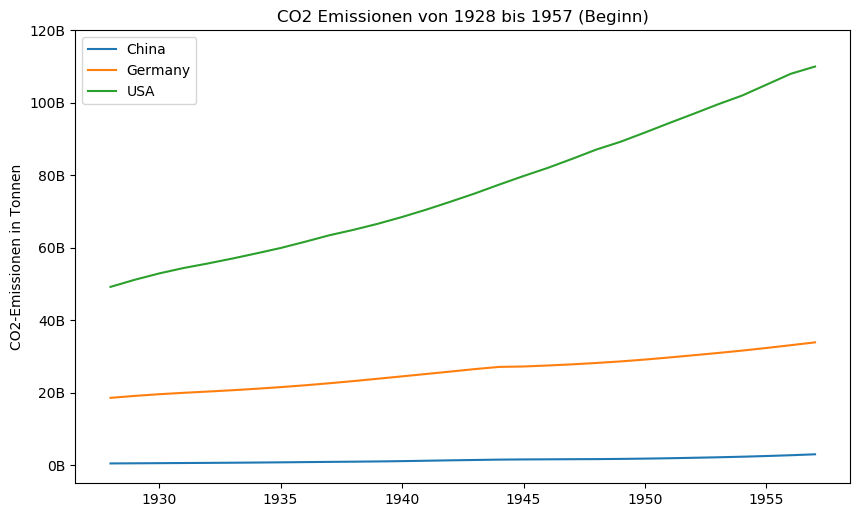

In [5]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1928,1958), Beginn.iloc[0,:],label="China")
plt.plot(range(1928,1958), Beginn.iloc[1,:],label="Germany")
plt.plot(range(1928,1958), Beginn.iloc[2,:],label="USA")
plt.title("CO2 Emissionen von 1928 bis 1957 (Beginn)")
plt.yticks([0e10,2e10,4e10,6e10,8e10,10e10,12e10],['0B','20B','40B','60B','80B','100B','120B'])
plt.legend()
plt.ylabel('CO2-Emissionen in Tonnen')
plt.show()

#### In diesem Zeitraum waren China und Deutschland deutlich umwelt-freundlicher als die USA. Das Volume von Emissonen in USA war viel größer als das in China und Deutschland zusammen. Der Wachstum der Emissonen von USA war auch schneller, mit einer steilen Kurve dargestellt, währenddessen war die Kurve von Deutschland sehr graduall und die von China fast eine horizontale Linie.


### Zeitabschnitt Mitte

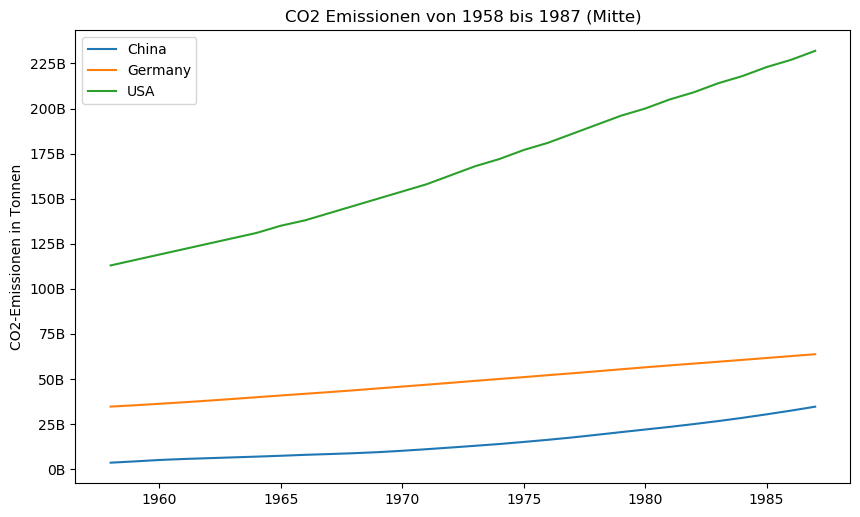

In [6]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1958,1988), Mitte.iloc[0,:],label="China")
plt.plot(range(1958,1988), Mitte.iloc[1,:],label="Germany")
plt.plot(range(1958,1988), Mitte.iloc[2,:],label="USA")
plt.title("CO2 Emissionen von 1958 bis 1987 (Mitte)")
plt.yticks([0.0e11,0.25e11,0.5e11,0.75e11,1.0e11,1.25e11,1.5e11,1.75e11,2.0e11,2.25e11], ['0B','25B','50B','75B','100B','125B','150B','175B','200B','225B'])
plt.legend()
plt.ylabel('CO2-Emissionen in Tonnen')
plt.show()

#### In dem nächsten Zeitraum wuchs die Emissonen in USA weiter sehr schnell im Vergleich zu den zwei anderen Ländern. Obwohl das Volume von emittierter CO2 und GHG in Deutschlanh noch größer als in China war, wuchs die Emission in dem asiatischen Land nach und nach schneller, insbesondere in den letzen Jahren des Zeitraums.


### Zeitabschnitt Ende

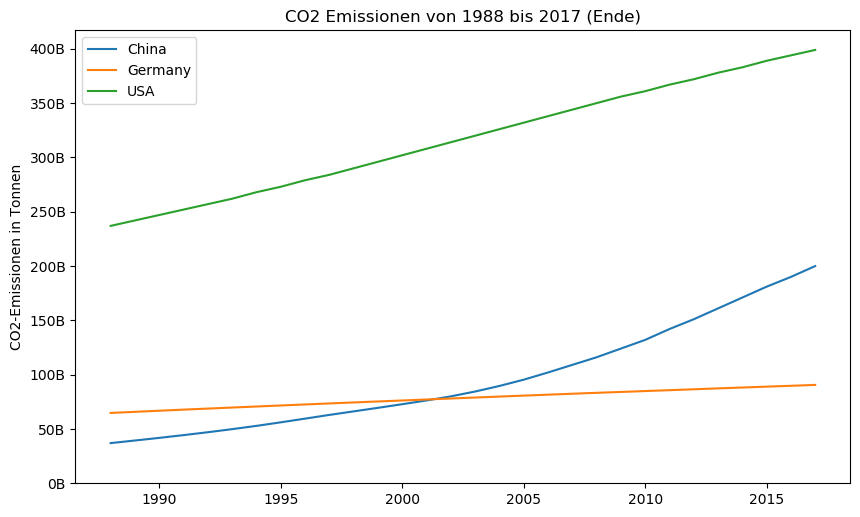

In [8]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1988,2018), Ende.iloc[0,:],label="China")
plt.plot(range(1988,2018), Ende.iloc[1,:],label="Germany")
plt.plot(range(1988,2018), Ende.iloc[2,:],label="USA")
plt.title("CO2 Emissionen von 1988 bis 2017 (Ende)")
plt.yticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11,3.0e11,3.5e11,4.0e11], 
           ['0B','50B','100B','150B','200B','250B','300B','350B','400B'])
plt.legend()
plt.ylabel('CO2-Emissionen in Tonnen')
plt.show()

#### Die USA blieben immer noch auf dem 1. Platz, mit ständiges Anstieg. China hatte mit dem rasanten Wachstum den 2. Platz von Deutschland übernommen. Der Anstieg in den letzen Jahren dieser Phase war sogar höher als der von den USA. Deutschland hatte im Gegensatz zu den zwei anderen Ländern ein sehr langsamen Wachstum von CO2-Emissonen.

## 1.2) Histogramme der drei Zeitabschnitte für China, Germany und USA

In [9]:
chinaB= Beginn.iloc[0,:]
gerB= Beginn.iloc[1,:]
usaB= Beginn.iloc[2,:]

chinaM= Mitte.iloc[0,:]
gerM= Mitte.iloc[1,:]
usaM= Mitte.iloc[2,:]

chinaE= Ende.iloc[0,:]
gerE = Ende.iloc[1,:]
usaE = Ende.iloc[2,:]

### Histogramm von CO2 Emissionen in China (Beginn)

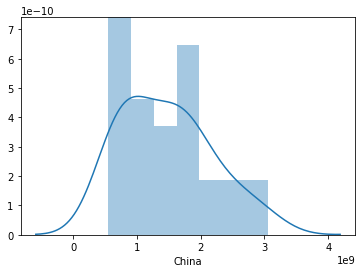

In [10]:
sns.distplot(chinaB,bins=7)# Histogramm von CO2 Emissionen in China (Beginn 1928-1957)

### Histogramm von CO2 Emissionen in China (Mitte)

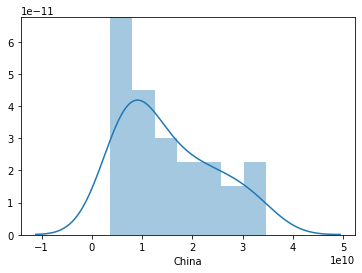

In [11]:
sns.distplot(chinaM,bins=7)# Histogramm von CO2 Emissionen in China (Mitte 1958-1987)

### Histogramm von CO2 Emissionen in China (Ende)

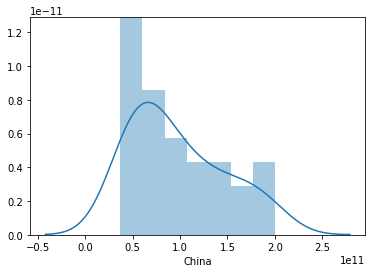

In [12]:
sns.distplot(chinaE,bins=7)# Histogramm von CO2 Emissionen in China (Ende 1988-2017)

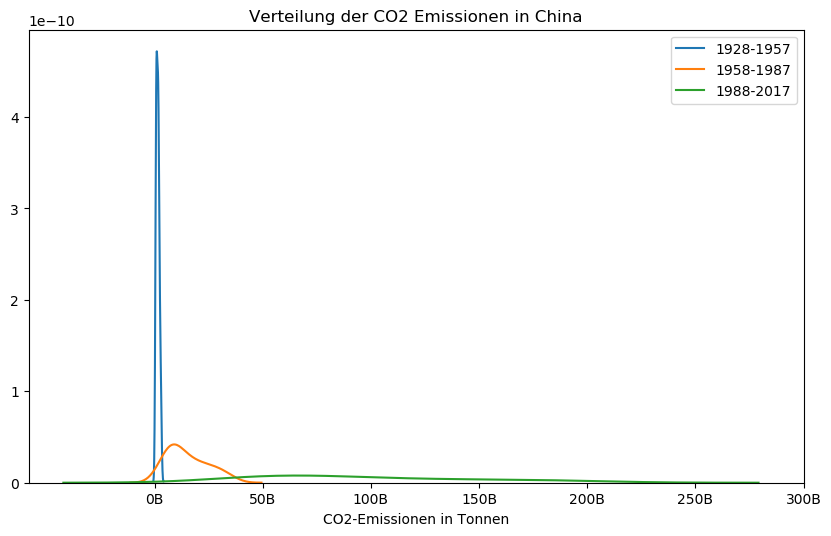

In [13]:
plt.figure(figsize=(10, 6), dpi=100)
plt.title("Verteilung der CO2 Emissionen in China")

sns.distplot(chinaB, hist=False, label='1928-1957')
sns.distplot(chinaM, hist=False, label='1958-1987')
sns.distplot(chinaE, hist=False, label='1988-2017')

plt.xticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11,3.0e11], 
           ['0B','50B','100B','150B','200B','250B','300B'])
plt.legend()
plt.xlabel('CO2-Emissionen in Tonnen')
plt.show()

#### Am Anfang vorkommen überwiegend sehr kleine Werte (peak blaue Kurve). Dies bedeutet dass in diesem Zeitraum die Volumen der Emissionen in China eher niedrig sind und deren Werte relativ wenig von einander abweichen (entspricht dem langsamen Wachstum). In den nächsten Zeitabschnitten, verschieben sich die Kurven nach rechts (zu den größeren Werten), am deutlichsten ist es mit der grünen Kurve zu sehen. Dass diese Kurven viel flacher (als blaue Kurve) sind, bedeutet eine größere Abweichung der Werten (entspricht dem schnellen Wachstum).

### Histogramm von CO2 Emissionen in Germany (Beginn)

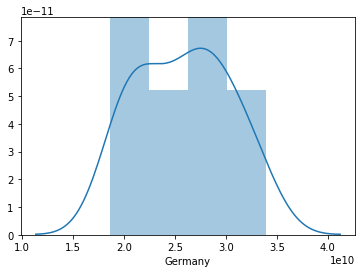

In [14]:
sns.distplot(gerB)# Histogramm von CO2 Emissionen in Deutschland (Beginn 1928-1957)

### Histogramm von CO2 Emissionen in Germany (Mitte)

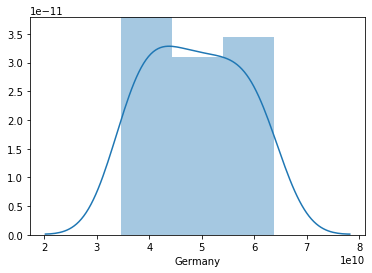

In [15]:
sns.distplot(gerM)# Histogramm von CO2 Emissionen in Deutschland (Mitte 1958-1987)

### Histogramm von CO2 Emissionen in Germany (Ende)

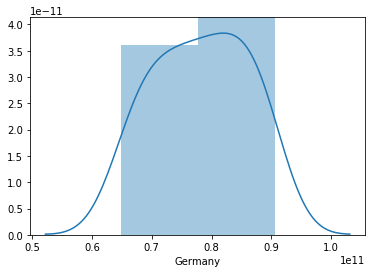

In [16]:
sns.distplot(gerE)# Histogramm von CO2 Emissionen in Deutschland (Ende 1988-2017)

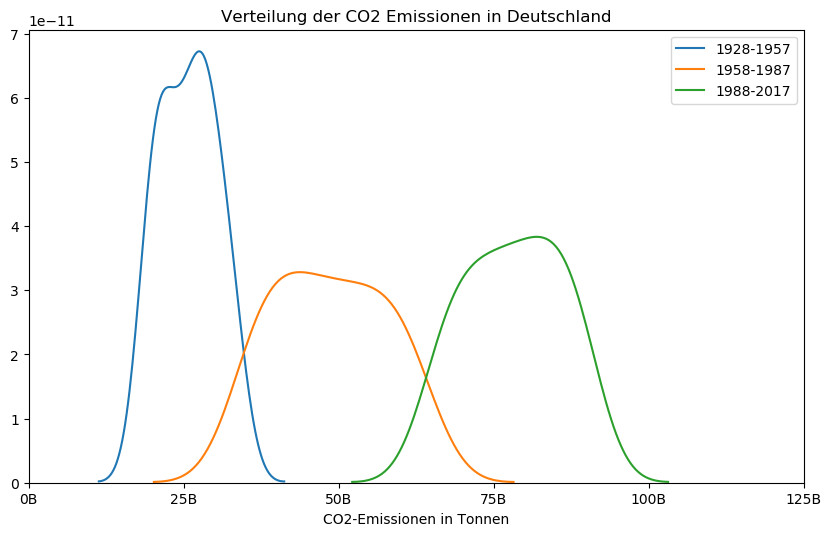

In [17]:
plt.figure(figsize=(10, 6), dpi=100)
plt.title("Verteilung der CO2 Emissionen in Deutschland")

sns.distplot(gerB, hist=False, label='1928-1957')
sns.distplot(gerM, hist=False, label='1958-1987')
sns.distplot(gerE, hist=False, label='1988-2017')

plt.xticks([0.0e11,0.25e11,0.5e11,0.75e11,1.0e11,1.25e11], 
           ['0B','25B','50B','75B','100B','125B'])
plt.legend()
plt.xlabel('CO2-Emissionen in Tonnen')
plt.show()

### Histogramm von CO2 Emissionen in den USA (Beginn)

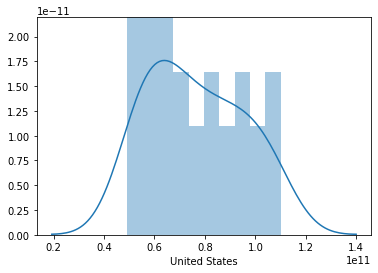

In [18]:
sns.distplot(usaB,bins=10)# Histogramm von CO2 Emissionen in den USA (Beginn 1928-1957)

### Histogramm von CO2 Emissionen in den USA (Mitte)

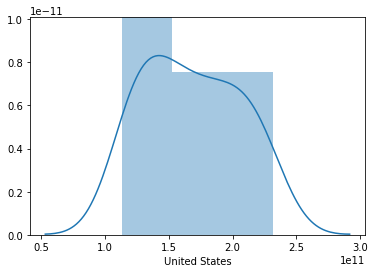

In [19]:
sns.distplot(usaM)# Histogramm von CO2 Emissionen in den USA (Mitte 1958-1987)

### Histogramm von CO2 Emissionen in den USA (Ende)

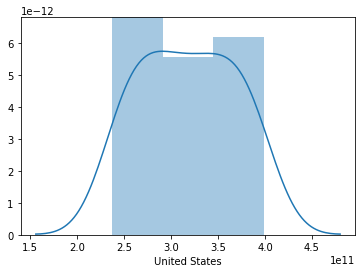

In [20]:
sns.distplot(usaE)# Histogramm von CO2 Emissionen in den USA (Ende 1988-2017)

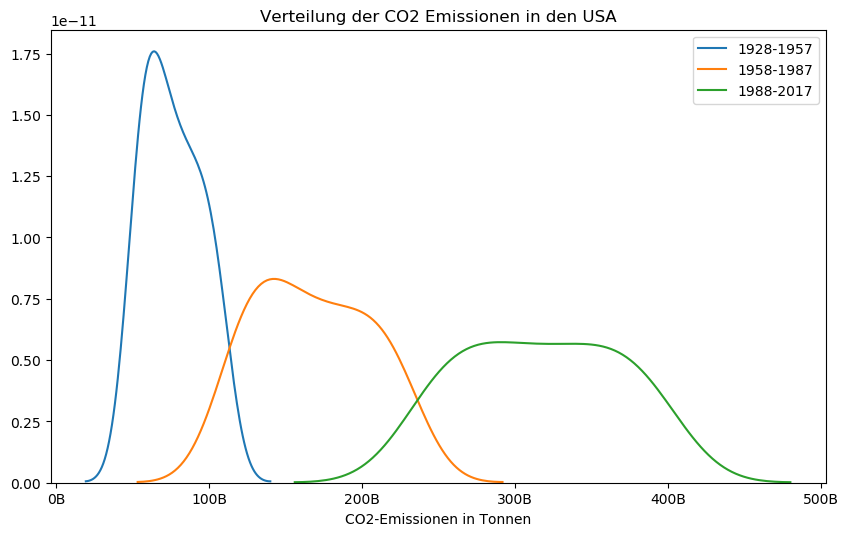

In [21]:
plt.figure(figsize=(10, 6), dpi=100)
plt.title("Verteilung der CO2 Emissionen in den USA")

sns.distplot(usaB, hist=False, label='1928-1957')
sns.distplot(usaM, hist=False, label='1958-1987')
sns.distplot(usaE, hist=False, label='1988-2017')

plt.xticks([0.0e11,1.0e11,2.0e11,3.0e11,4.0e11,5.0e11], 
           ['0B','100B','200B','300B','400B','500B'])
plt.legend()
plt.xlabel('CO2-Emissionen in Tonnen')
plt.show()

#### Auch in den Histogrammen von Deutschland und den USA sieht man die ähnlichen Merkmalen, die man bei der Histogramme von China gesehen hat: Die Kurven verschieben sich nach rechts. Die 1. Kurve ist immer noch die engsten, aber nicht so spitz wie die von China. Die 2. und 3. Kurven sind breiter, aber nicht so flach wie die von China (insbesondere die 3. Kurve). --> Diese kleinen Unterschiede entsprechen der ständigen Änderung (Steigerung) von Emissionen in den USA und Deutschland, im Gegensatz zu der Situation in China.


## 1.3) Zeitreihendarstellungen der gesamte Zeitperiode von 1928 bis 2017 

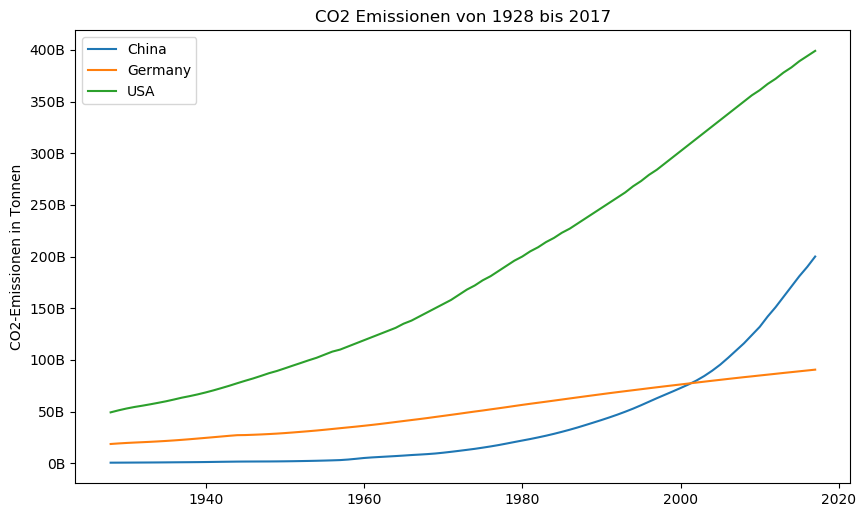

In [22]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1928,2018),Ganze.iloc[0,:], label="China")
plt.plot(range(1928,2018),Ganze.iloc[1,:], label="Germany")
plt.plot(range(1928,2018),Ganze.iloc[2,:], label="USA")
plt.yticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11,3.0e11,3.5e11,4.0e11], 
           ['0B','50B','100B','150B','200B','250B','300B','350B','400B'])
plt.title("CO2 Emissionen von 1928 bis 2017")
plt.legend()
plt.ylabel('CO2-Emissionen in Tonnen')
plt.show()

#### Hier hat man ein Übersicht von was schon diskutiert wurde. Unter drei berücksichtigten Ländern: Emitiert die USA immer das größte Volume von CO2 und GHG, die Jahr für Jahr ziemlich ständig wächst. Erzeugt Deutschland (vom Beginn bis 2000s) das zweitgrößte Volume von Emission aber mit sehr langsamem Wachstum. Hat China den niedrigsten Anfangspunkt, erzeugt aber mit dem rasanten Wachstum der Emissionen von CO2 in letzten Jahrzehten mehr als dreifach das Volume von Emissionen von Deutschland im Jahr 2017.


# 2) Analysieren Sie die Daten in Bezug auf Trend und Saisonalität
• Wie unterscheiden sich die Trendgeraden (univariate Regression) für unterschiedlich lange (seit Beginn, Mitte, Ende) Datensätze?

• Wie sieht das Ergebnis für unterschiedliche Trendfunktionen (linear, polynomial, exponentiell) aus?

## 2.1) Lineare Einfachregression

In [23]:
def linModell(years, dataset, draw_at_year, name):
    slope, intercept, r_value, p_value, std_err = stats.linregress(years,dataset)
    Trend = intercept + slope * years
    plt.plot(years+draw_at_year, Trend,label=name)
    return slope,Trend
# Funktion für Skizieren des linearen Modell und slope, Trend zurückgeben

### ---- China ----

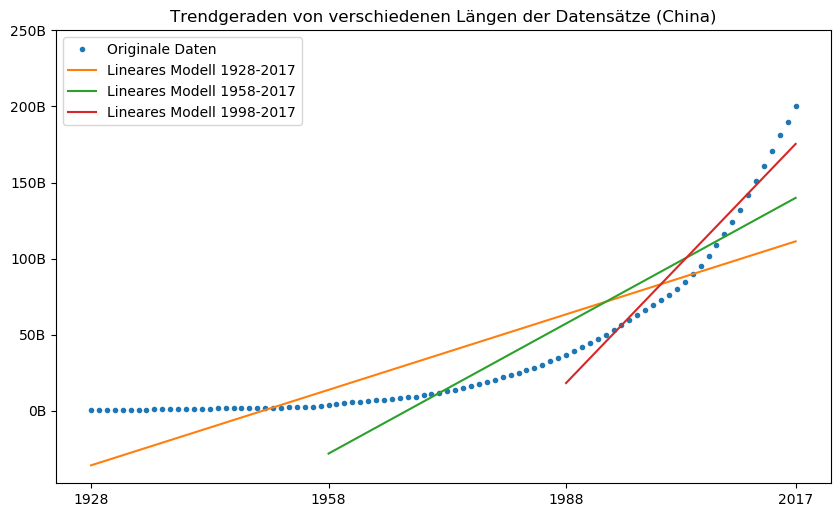

In [24]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1,91),Ganze.iloc[0,:],'.',label='Originale Daten')
slopeC1,TrendC1= linModell (np.arange(1,91,1), Ganze.iloc[0,:], 0,'Lineares Modell 1928-2017')
slopeC2,TrendC2= linModell (np.arange(1,61,1), Ganze.iloc[0,30:], 30,'Lineares Modell 1958-2017')
slopeC3,TrendC3= linModell (np.arange(1,31,1),Ganze.iloc[0,60:],60,'Lineares Modell 1998-2017')

plt.legend()
plt.yticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11], 
           ['0B','50B','100B','150B','200B','250B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])

plt.title("Trendgeraden von verschiedenen Längen der Datensätze (China)")
plt.show()

In [25]:
print('SteigungBeginn:\t',slopeC1)
print('SteigungMitte:\t',slopeC2)
print('SteigungEnde:\t',slopeC3)

SteigungBeginn:	 1653169888.6095977
SteigungMitte:	 2846741018.974242
SteigungEnde:	 5417005451.089433


#### Aus dieser Darstellung kann man leicht sehen dass die Trendgeraden deutlich steiler geworden sind, dies bedeutet ein rasant steigender Trend der CO2- und GHG-Emissionen in China in den letzten Jahrzehnten.

### ---- Germany ----

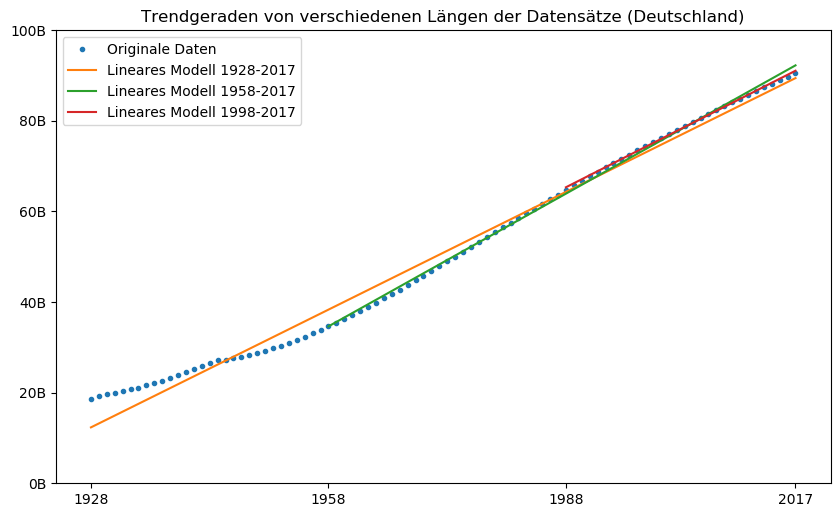

In [26]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1,91),Ganze.iloc[1,:],'.',label='Originale Daten')

slopeG1,TrendG1= linModell (np.arange(1,91,1), Ganze.iloc[1,:], 0,'Lineares Modell 1928-2017')
slopeG2,TrendG2=linModell (np.arange(1,61,1), Ganze.iloc[1,30:], 30,'Lineares Modell 1958-2017')
slopeG3,TrendG3=linModell (np.arange(1,31,1),Ganze.iloc[1,60:],60,'Lineares Modell 1998-2017')


plt.legend()
plt.yticks([0.0e11,0.2e11,0.4e11,0.6e11,0.8e11,1.0e11], 
           ['0B','20B','40B','60B','80B','100B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])
plt.title("Trendgeraden von verschiedenen Längen der Datensätze (Deutschland)")
plt.show()

In [27]:
print('SteigungBeginn:\t',slopeG1)
print('SteigungMitte:\t',slopeG2)
print('SteigungEnde:\t',slopeG3)

SteigungBeginn:	 866297897.5651643
SteigungMitte:	 976667245.8708531
SteigungEnde:	 887113411.9937708


#### Aus dieser Darstellung kann man sehen dass das lineares Modell in alle Zeitabschnitte den originalen Daten ziemlich gut passen. Dies bedeutet ein fast stetige Anstieg der Emissionen in jeder Periode bzw. während des gesamten Zeitraumes. Durch den Steigungen kann man aber auch detailliert sehen dass der Wachstum im letzten Zeitraum abgenommen wird, welche gut fürs Klima aber in den Plotten von China und den USA gar nicht der Fall ist.

### ---- USA ----

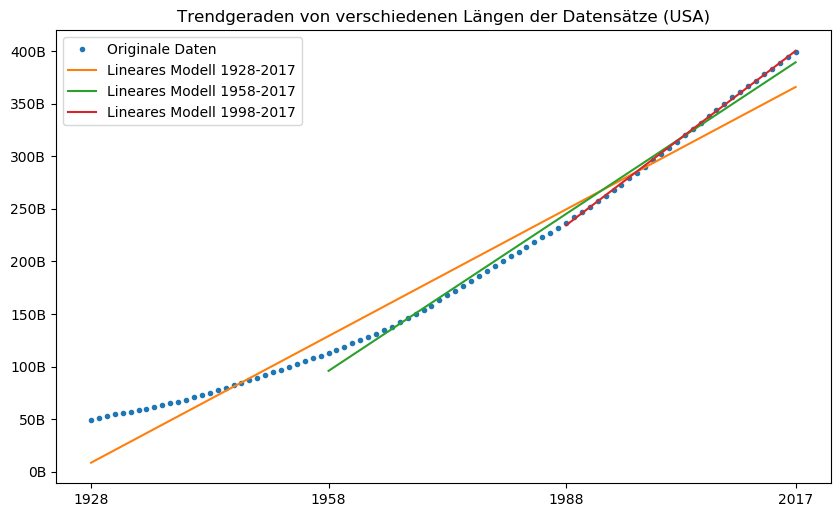

In [28]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1,91),Ganze.iloc[2,:],'.',label='Originale Daten')

slopeU1,TrendU1= linModell (np.arange(1,91,1), Ganze.iloc[2,:], 0,'Lineares Modell 1928-2017')
slopeU2,TrendU2= linModell (np.arange(1,61,1), Ganze.iloc[2,30:], 30,'Lineares Modell 1958-2017')
slopeU3,TrendU3= linModell (np.arange(1,31,1),Ganze.iloc[2,60:],60,'Lineares Modell 1998-2017')


plt.legend()
plt.yticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11,3.0e11,3.5e11,4.0e11], 
           ['0B','50B','100B','150B','200B','250B','300B','350B','400B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])
plt.title("Trendgeraden von verschiedenen Längen der Datensätze (USA)")
plt.show()

In [29]:
print('SteigungBeginn:\t',slopeU1)
print('SteigungMitte:\t',slopeU2)
print('SteigungEnde:\t',slopeU3)

SteigungBeginn:	 4015852286.5278172
SteigungMitte:	 4975687691.025285
SteigungEnde:	 5721023359.288096


###### Aus dieser Darstellung kann man sehen dass die Trendgeraden steiler geworden sind, aber wenn man die Steigungen anschaut, erkennt man eine langsamere Zunahme des Wachstums in den letzten Jahrzehten.

## 2.2) Polynomiale und Exponentielle Modelle

In [30]:
years=np.arange(1,91,1)# 90 Jahre
years

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90])

### ---- China ----
#### Polynomiales Modell

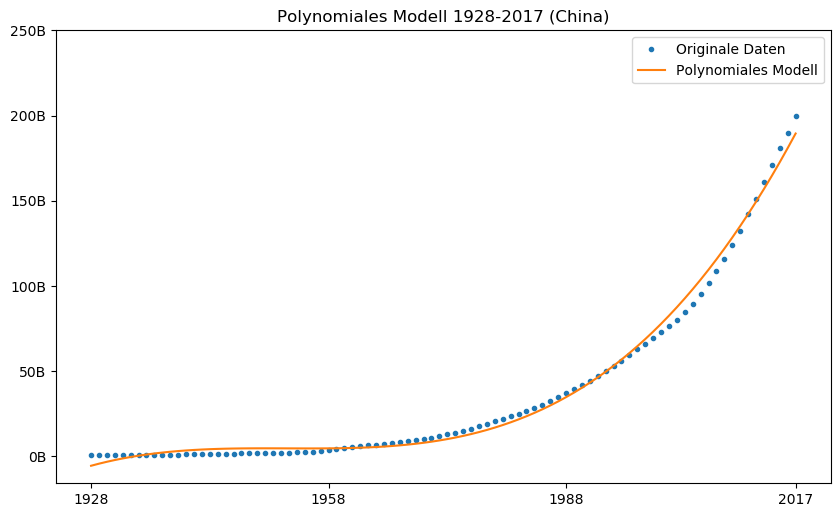

In [31]:
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 6), dpi=100)

def funcP(x,b0,b1,b2,b3):
    return b0+b1*x+b2*x**2+b3*x**3

poptpolyC, pcovpolyC = curve_fit(funcP,years,Ganze.iloc[0,:])
PolyChina= funcP(years, *poptpolyC)
plt.plot(years, Ganze.iloc[0,:],'.', label='Originale Daten')
plt.plot(years, PolyChina,label ='Polynomiales Modell')
plt.yticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11], 
           ['0B','50B','100B','150B','200B','250B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])
plt.title('Polynomiales Modell 1928-2017 (China)')
plt.legend()
plt.show()

#### Exponentielles Modell

In [32]:
from scipy.optimize import curve_fit

def funcE(x, a, b, c):
    return a * np.exp(-b*x)+c
#years=np.arange(1,91,1)

poptexpC, pcovexpC =curve_fit(funcE, years,Ganze.iloc[0,:], [10000, 0.1,10000])

ExpChina= funcE(years,*poptexpC)

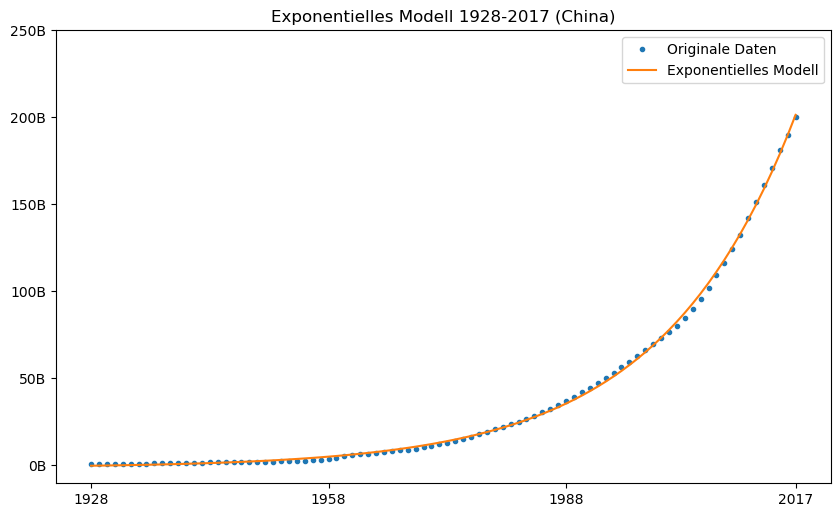

In [33]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(years, Ganze.iloc[0,:],'.', label='Originale Daten')
plt.plot(years, ExpChina,label ='Exponentielles Modell')

plt.yticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11], 
           ['0B','50B','100B','150B','200B','250B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])
plt.title('Exponentielles Modell 1928-2017 (China)')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
rmseLinChina = sqrt(mean_squared_error(Ganze.iloc[0,:],TrendC1))
rmsePolyChina = sqrt(mean_squared_error(Ganze.iloc[0,:],PolyChina))
rmseExpChina = sqrt(mean_squared_error(Ganze.iloc[0,:],ExpChina))

print('RMSE China (lin.):\t', rmseLinChina) 
print('RMSE China (poly.):\t', rmsePolyChina)
print('RMSE China (exp.):\t', rmseExpChina)

RMSE China (lin.):	 27114998071.33642
RMSE China (poly.):	 3749146001.275303
RMSE China (exp.):	 1293751377.4048226


##### Das exponentialle Modell liefert das kleinste RMSE und daher ist das Modell, das den Daten von China am besten passt.

### ---- Germany ----
#### Polynomiales Modell

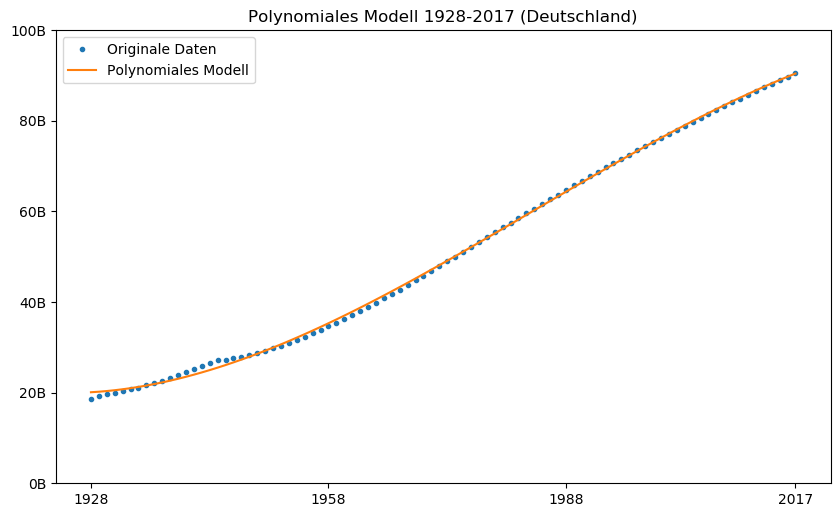

In [36]:
plt.figure(figsize=(10, 6), dpi=100)


def funcP(x,b0,b1,b2,b3):
    return b0+b1*x+b2*x**2+b3*x**3
poptpolyG, pcovpolyG = curve_fit(funcP,years,Ganze.iloc[1,:])
PolyGer= funcP(years, *poptpolyG)
plt.plot(years, Ganze.iloc[1,:],'.', label='Originale Daten')
plt.plot(years, PolyGer,label ='Polynomiales Modell')
plt.yticks([0.0e11,0.2e11,0.4e11,0.6e11,0.8e11,1.0e11], 
           ['0B','20B','40B','60B','80B','100B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])
plt.title('Polynomiales Modell 1928-2017 (Deutschland)')
plt.legend()
plt.show()

#### Exponentielles Modell

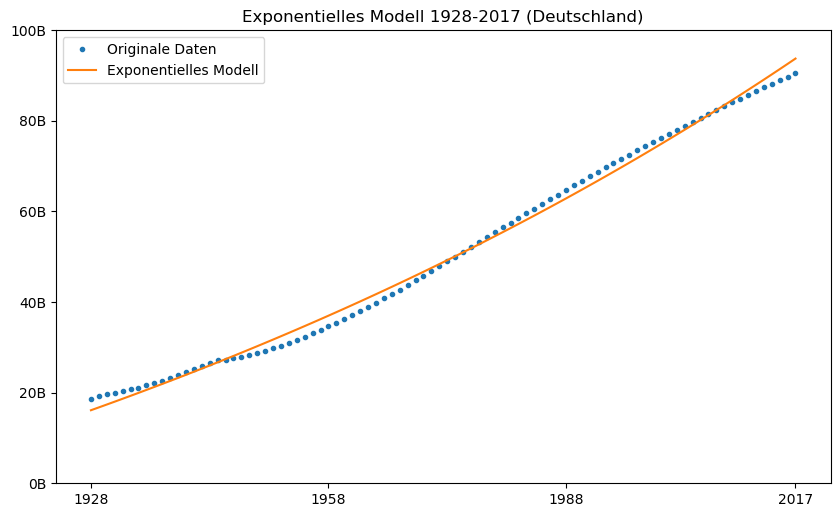

In [37]:
poptexpG, pcovexpG =curve_fit(funcE, years,Ganze.iloc[1,:], [100000, 0.01,100000])

ExpGer= funcE(years,*poptexpG)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(years, Ganze.iloc[1,:],'.', label='Originale Daten')
plt.plot(years, ExpGer,label ='Exponentielles Modell')

plt.yticks([0.0e11,0.2e11,0.4e11,0.6e11,0.8e11,1.0e11], 
           ['0B','20B','40B','60B','80B','100B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])
plt.title('Exponentielles Modell 1928-2017 (Deutschland)')
plt.legend()
plt.show()

In [38]:
rmseLinGer = sqrt(mean_squared_error(Ganze.iloc[1,:],TrendG1))
rmsePolyGer = sqrt(mean_squared_error(Ganze.iloc[1,:],PolyGer))
rmseExpGer = sqrt(mean_squared_error(Ganze.iloc[1,:],ExpGer))

print('RMSE Deutschland (lin.):\t', rmseLinGer) 
print('RMSE Deutschland (poly.):\t', rmsePolyGer)
print('RMSE Deutschland (exp.):\t', rmseExpGer)

RMSE Deutschland (lin.):	 2504138594.5120764
RMSE Deutschland (poly.):	 552515471.9240227
RMSE Deutschland (exp.):	 1573143132.4768016


##### Das polynomiale Modell liefert das kleinste RMSE und daher ist das Modell, das den Daten von Deutschland am besten passt.

### ---- United States ----
#### Polynomiales Modell

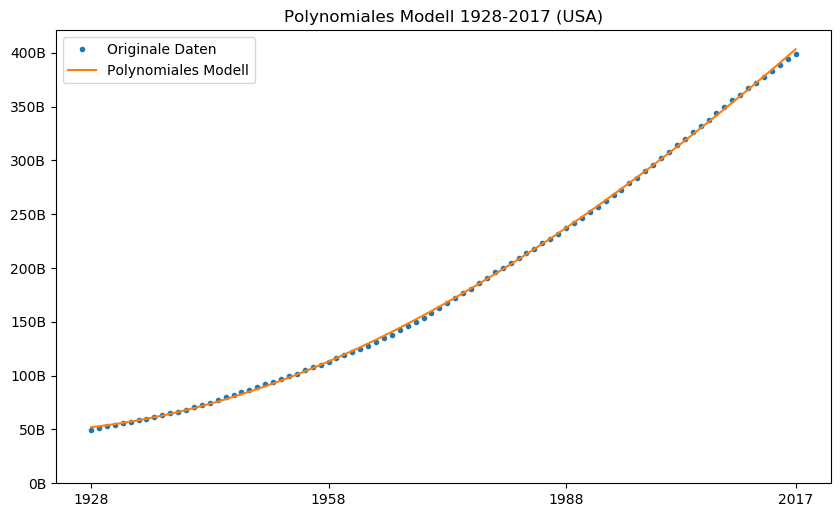

In [39]:
plt.figure(figsize=(10, 6), dpi=100)


def funcP(x,b0,b1,b2,b3):
    return b0+b1*x+b2*x**2+b3*x**3
poptpolyU, pcovpolyU = curve_fit(funcP,years,Ganze.iloc[2,:],[10,10,0.1,10])
PolyU= funcP(years, *poptpolyU)
plt.plot(years, Ganze.iloc[2,:],'.', label='Originale Daten')
plt.plot(years, PolyU,label ='Polynomiales Modell')
plt.yticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11,3.0e11,3.5e11,4.0e11], 
           ['0B','50B','100B','150B','200B','250B','300B','350B','400B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])
plt.title('Polynomiales Modell 1928-2017 (USA)')
plt.legend()
plt.show()

#### Exponentielles Modell


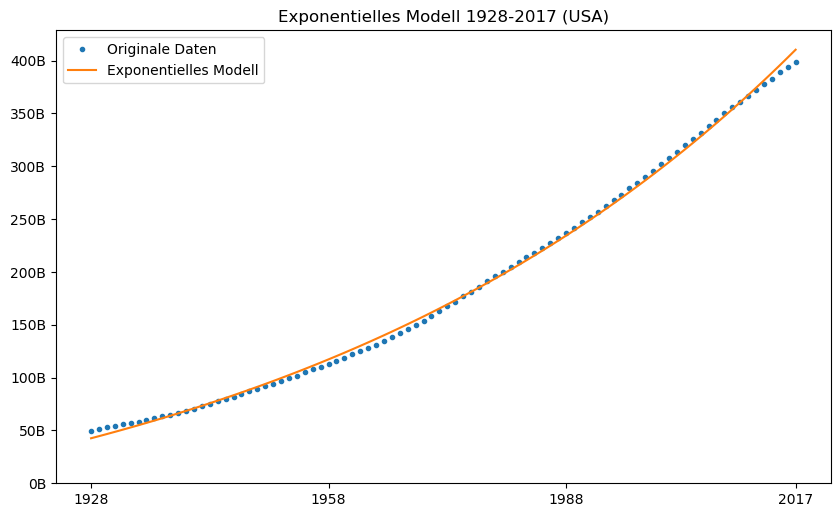

In [42]:
poptexpU, pcovexpU =curve_fit(funcE, years,Ganze.iloc[2,:], [100000, 0.01,100000])

ExpU= funcE(years,*poptexpU)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(years, Ganze.iloc[2,:],'.', label='Originale Daten')
plt.plot(years, ExpU,label ='Exponentielles Modell')

plt.yticks([0.0e11,0.5e11,1.0e11,1.5e11,2.0e11,2.5e11,3.0e11,3.5e11,4.0e11], 
           ['0B','50B','100B','150B','200B','250B','300B','350B','400B'])
plt.xticks([1,31,61,90], 
           ['1928','1958','1988','2017'])
plt.title('Exponentielles Modell 1928-2017 (USA)')
plt.legend()
plt.show()

In [43]:
rmseLinU = sqrt(mean_squared_error(Ganze.iloc[2,:],TrendU1))
rmsePolyU = sqrt(mean_squared_error(Ganze.iloc[2,:],PolyU))
rmseExpU = sqrt(mean_squared_error(Ganze.iloc[2,:],ExpU))

print('RMSE die USA (lin.):\t', rmseLinU) 
print('RMSE die USA (poly.):\t', rmsePolyU)
print('RMSE die USA (exp.):\t', rmseExpU)

RMSE die USA (lin.):	 18822738117.68265
RMSE die USA (poly.):	 1416878471.495488
RMSE die USA (exp.):	 3719598366.684952


#### Das polynomiale Modell liefert das kleinste RMSE und daher ist das Modell, das den Daten von den USA am besten passt.

# 3) Analysieren sie die Residuen
• Wählen Sie unterschiedliche Trendfunktionen (linear, polynomial, exponentiell) und stellen Sie die Residuen graphisch dar. Gibt es Unterschiede zwischen den drei Ländern?

• Welches Modell liefert das beste Ergebnis?

In [44]:
#Residuen China
resLinC= Ganze.iloc[0,:] - TrendC1
resPolyC= Ganze.iloc[0,:] - PolyChina
resExpC= Ganze.iloc[0,:] - ExpChina

In [45]:
#Residuen Deutschland
resLinG= Ganze.iloc[1,:] - TrendG1
resPolyG= Ganze.iloc[1,:] - PolyGer
resExpG= Ganze.iloc[1,:] - ExpGer

In [46]:
#Residuen USA
resLinU= Ganze.iloc[2,:] - TrendU1
resPolyU= Ganze.iloc[2,:] - PolyU
resExpU= Ganze.iloc[2,:] - ExpU

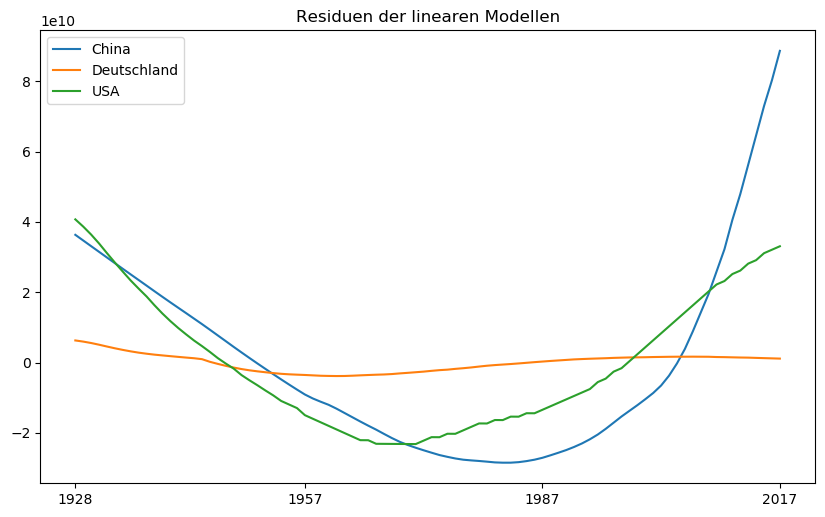

In [47]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(resLinC, label="China")
plt.plot(resLinG, label="Deutschland")
plt.plot(resLinU, label="USA")
plt.legend()
plt.xticks([0,29,59,89])
plt.title("Residuen der linearen Modellen")
plt.show()

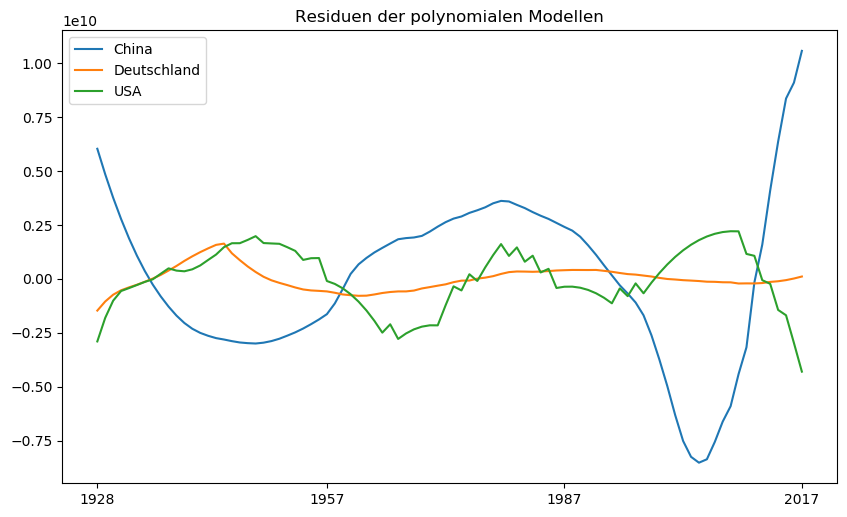

In [48]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(resPolyC, label="China")
plt.plot(resPolyG, label="Deutschland")
plt.plot(resPolyU, label="USA")
plt.legend()
plt.xticks([0,29,59,89])
plt.title("Residuen der polynomialen Modellen")
plt.show()

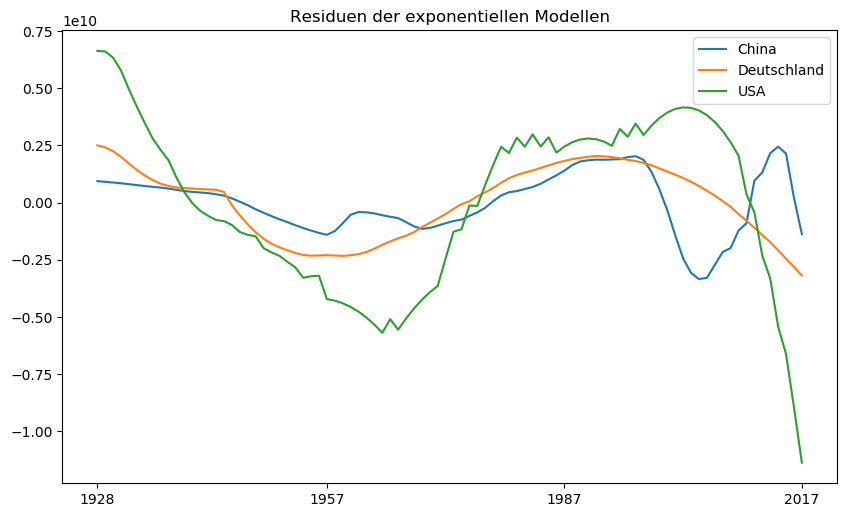

In [49]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(resExpC, label="China")
plt.plot(resExpG, label="Deutschland")
plt.plot(resExpU, label="USA")
plt.legend()
plt.xticks([0,29,59,89])
plt.title("Residuen der exponentiellen Modellen")
plt.show()

### ---- China ----

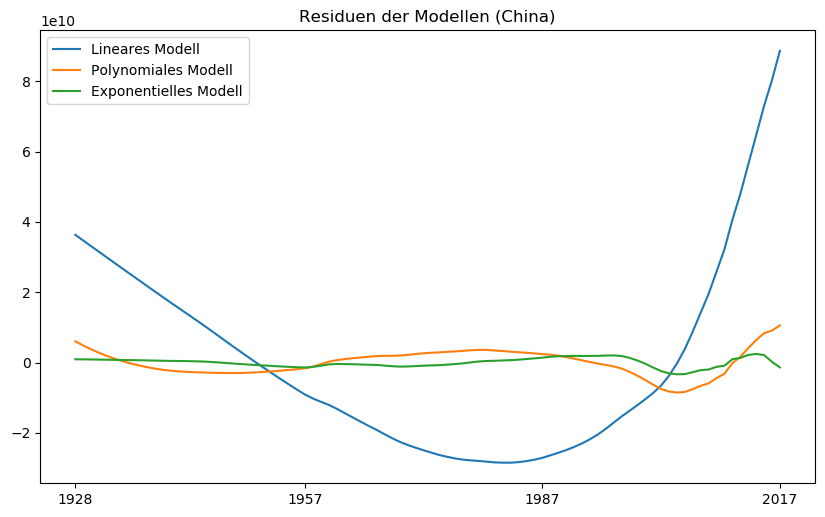

In [50]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(resLinC, label ="Lineares Modell")
plt.plot(resPolyC, label ="Polynomiales Modell")
plt.plot(resExpC, label ="Exponentielles Modell")
plt.legend()
plt.xticks([0,29,59,89])
plt.title("Residuen der Modellen (China)")
plt.show()

#### Das lineare Modell liefert eine Kurve von Residuen, die sehr stark von Null-Linie abweichen. Die Kurven von polynomialen und exponentiellen Modellen weichen nicht viel von Null-Linie ab, schwankt die Kurve des exponentiellen Modells aber weniger am Ende. Für die Daten von China liefert das exponentielle Modell die beste Annäherung.


### ---- Deutschland ----

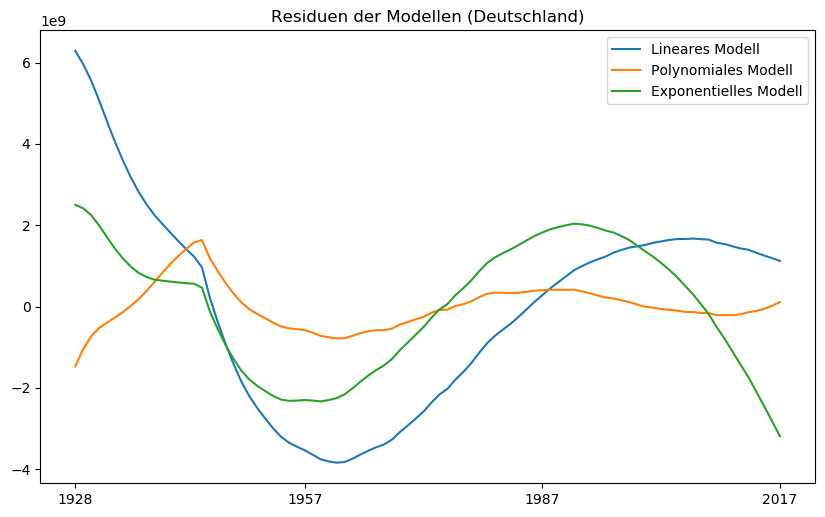

In [51]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(resLinG, label ="Lineares Modell")
plt.plot(resPolyG, label ="Polynomiales Modell")
plt.plot(resExpG, label ="Exponentielles Modell")
plt.legend()
plt.xticks([0,29,59,89])
plt.title("Residuen der Modellen (Deutschland)")
plt.show()

#### Die Kurven von linearen und exponentiellen Modellen schwanken sehr stark um Null-Linie. Das polynomiale Modell liefert eine Kurve die am wenigsten von der Null-Linie abweicht, besonders in den Zeitabschnitten Mitte und Ende. Für die Daten von Deutschland liefert das polynomiale Modell die beste Annäherung.


### ---- USA ----

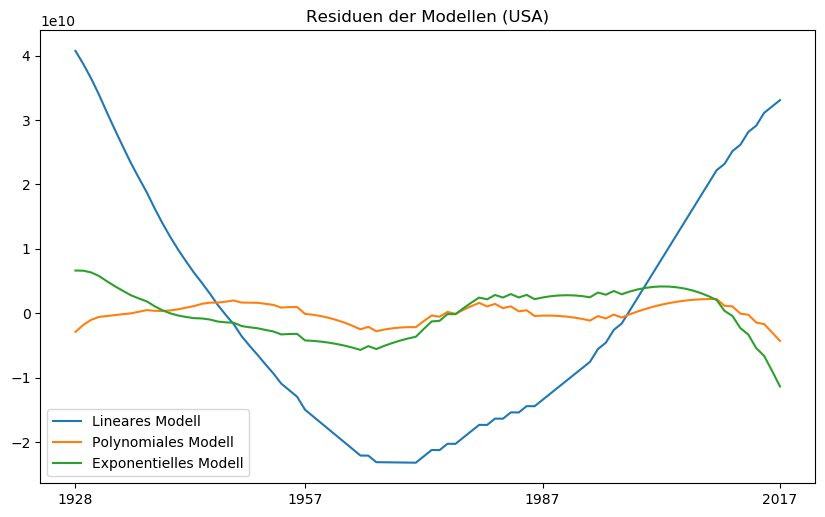

In [52]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(resLinU, label ="Lineares Modell")
plt.plot(resPolyU, label ="Polynomiales Modell")
plt.plot(resExpU, label ="Exponentielles Modell")
plt.legend()
plt.xticks([0,29,59,89])
plt.title("Residuen der Modellen (USA)")
plt.show()

#### Das lineare Modell liefert die schlechteste Annäherung da seine Residuen  sehr stark von Null-Linie abweichen. Die Kurven von polynomialen und exponentiellen Modellen schwanken weniger um Null-Linie, ist das Ergebnis vom polynomialen Modell leicht besser.  Für die Daten von den USA liefert das polynomiale Modell die beste Annäherung.
